In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = '/content/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

# 'Age' and 'Embarked' have missing values, and we'll handle them.
# Filling missing values in 'Age' with the mean value of the column.
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Filling missing values in 'Embarked' (port of embarkation) with the most common value (mode).
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns that are not useful for the prediction, such as 'Name', 'Ticket', and 'Cabin'.
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-2-b9c93d9e84c1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-2-b9c93d9e84c1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Convert categorical variables (like 'Sex' and 'Embarked') into numerical variables using one-hot encoding.
# This helps machine learning models to work with these categories.
# 'drop_first=True' is used to avoid dummy variable trap by removing one dummy column.
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Feature scaling: 'Age' and 'Fare' are continuous numeric variables, so we scale them.
# Scaling ensures that the model treats all features equally, preventing bias toward larger numbers.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler and apply it to 'Age' and 'Fare'
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [ ]:
# Split the dataset into features (X) and the target variable (y)
# X will contain all the features except 'Survived', while y will only contain 'Survived'
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable (whether the passenger survived)

# Split the dataset into training and testing sets to evaluate the model's performance on unseen data
# 70% of the data will be used for training, and 30% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Logistic Regression, a simple but effective algorithm for binary classification problems
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data (X_train, y_train)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import metrics to evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
precision = precision_score(y_test, y_pred)  # True positives / (True positives + False positives)
recall = recall_score(y_test, y_pred)  # True positives / (True positives + False negatives)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall

# Print the evaluation metrics for the model
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Generate and print the confusion matrix, which shows the counts of true positive, true negative, etc.
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.80
Precision: 0.81
Recall: 0.68
F1 Score: 0.74
Confusion Matrix:
 [[139  18]
 [ 35  76]]


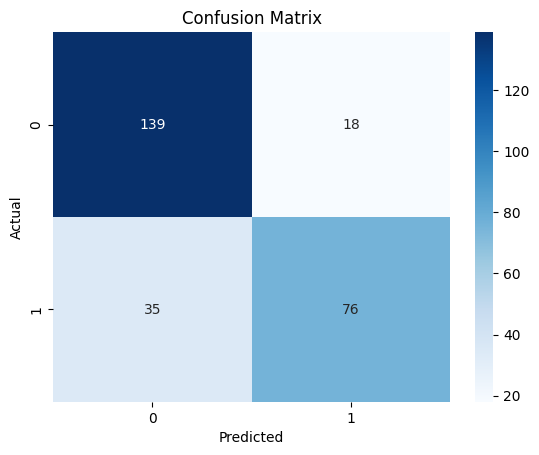

In [ ]:
# Visualize the confusion matrix using a heatmap for better interpretation
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')  # Title of the plot
plt.xlabel('Predicted')  # Label for predicted values
plt.ylabel('Actual')  # Label for actual values
plt.show()